<h1> Linear regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from LinearRegression import LinearRegression

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def linear_function(x):
    return 4 * x + 9

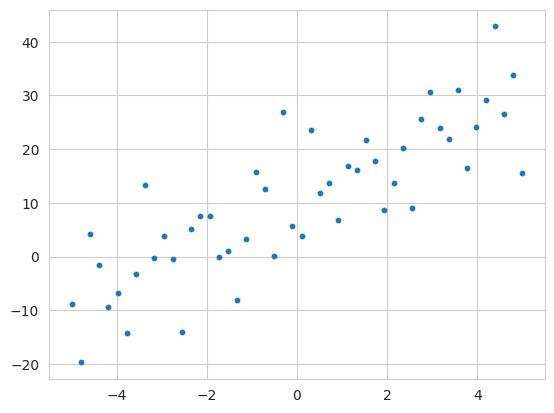

In [4]:
n_objects = 50
x = np.linspace(-5, 5, n_objects)
y = linear_function(x) + np.random.randn(n_objects) * 10
plt.scatter(x, y, s=10)

In [5]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(x, y, test_size=0.25)

weights: [[3.68328256]
 [9.54942873]]


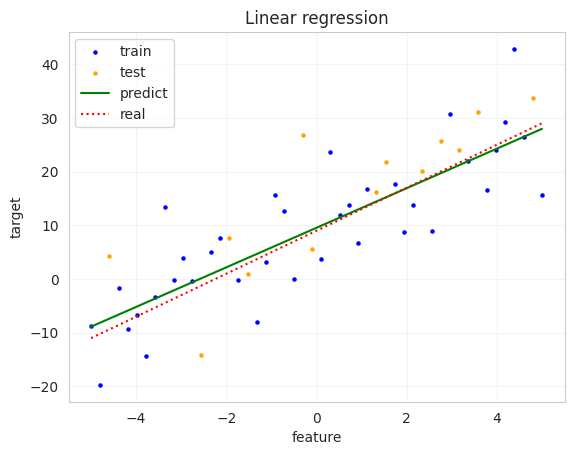

In [6]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])
print(f'weights: {regressor.get_weights()}')

plt.scatter(features_train, target_train, label='train', s=5, c='b')
plt.scatter(features_test, target_test, label='test', s=5, c='orange')
plt.plot(x, regressor.predict(x[:, np.newaxis]), label='predict', c='g')
plt.plot(x, linear_function(x), label='real', c='r', linestyle=':')

plt.xlabel('feature')
plt.ylabel('target')
plt.title("Linear regression")
plt.grid(alpha=0.2)
plt.legend()

<h2> Loss function

In [7]:
from sklearn.metrics import mean_squared_error

print(f'Train MSE: {mean_squared_error(target_train, regressor.predict(features_train[:, np.newaxis]))}')
print(f'Test MSE: {mean_squared_error(target_test, regressor.predict(features_test[:, np.newaxis]))}')

Train MSE: 54.83510157697685
Test MSE: 71.5426790601118


<h2> Gradient descent

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

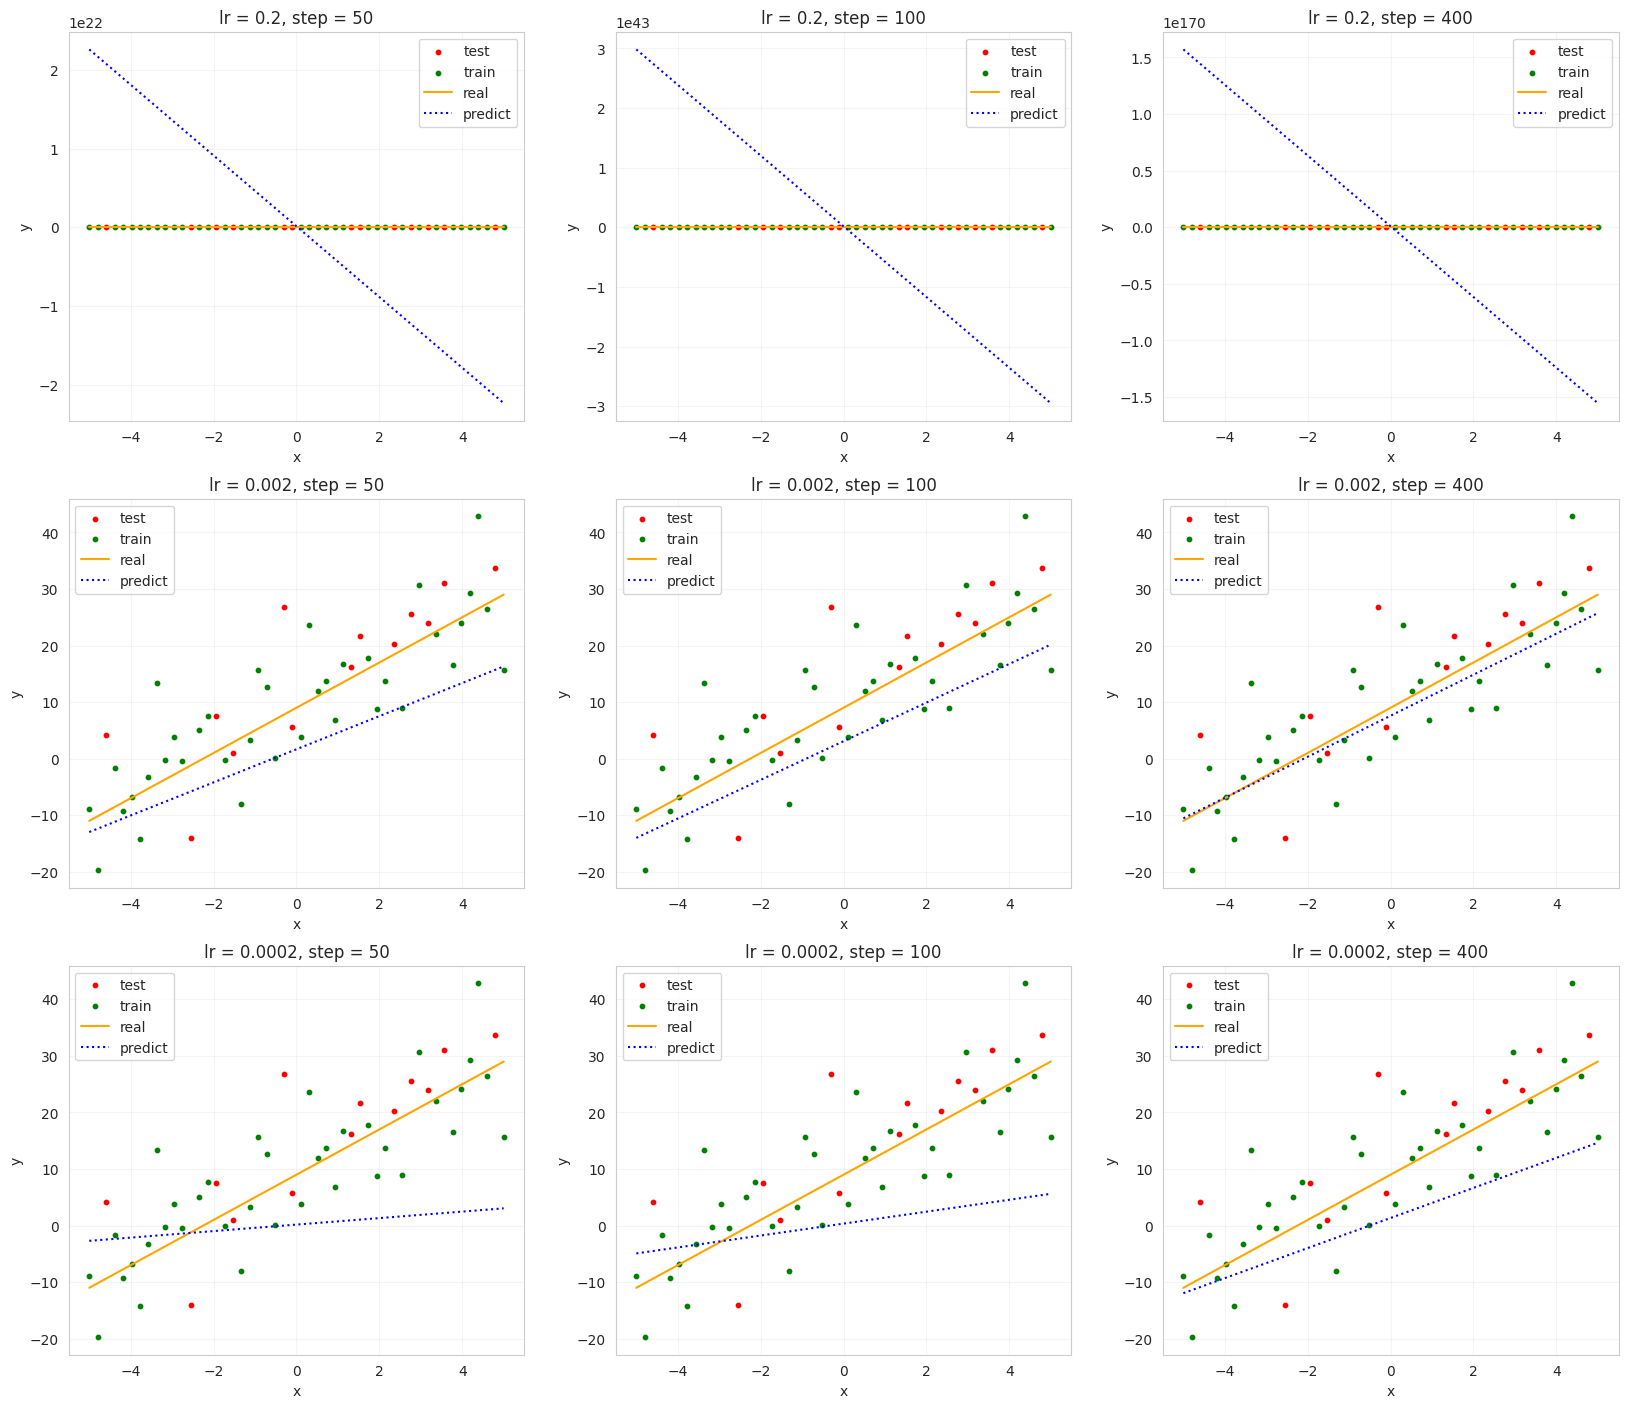

In [9]:
from LinearRegression import LinearRegressionGD
from LinearRegression import LinearRegressionGD
%matplotlib inline

lr_list = [0.2, 0.002, 0.0002]
steps_list = [50, 100, 400]
plt.figure(figsize=(20, 7))
plt.subplots_adjust(top=2)

for i, lr in enumerate(lr_list):
    for j, steps in enumerate(steps_list):
        ax = plt.subplot(3, 3, len(lr_list) * i + j + 1)
        regressor = LinearRegressionGD(fit_intercept=True)
        regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis], lr=lr, steps=steps)
        
        plt.scatter(features_test, target_test, label='test', c='r', s=10)
        plt.scatter(features_train, target_train, label='train', c='g', s=10)
        plt.plot(x, linear_function(x), label='real', c='orange')
        plt.plot(x, regressor.predict(x[:, np.newaxis]), label='predict', c='b', linestyle=':')
        plt.grid(alpha=0.2)
        plt.title(f'lr = {lr}, step = {steps}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
plt.show()

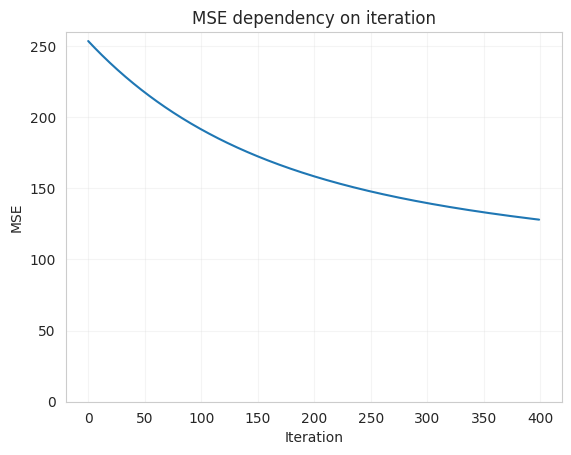

In [10]:
losses = regressor.get_losses()
plt.plot(losses)
plt.title('MSE dependency on iteration')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

<h2> SGD

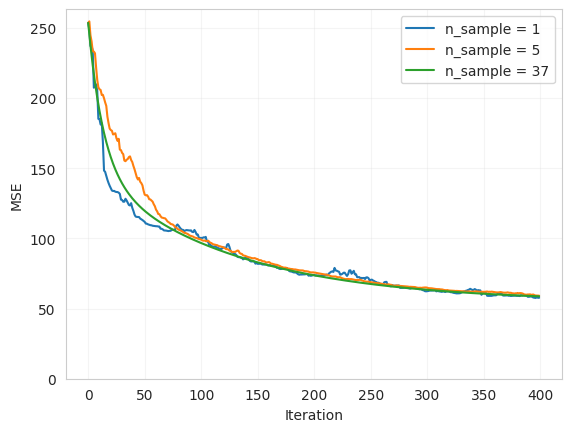

In [11]:
from LinearRegression import LinearRegressionSGD

n_sample_list = [1, 5, len(features_train)]

for i, n_sample in enumerate(n_sample_list):
    regressor = LinearRegressionSGD(fit_intercept=True,  n_sample=n_sample)
    regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis], lr=0.002, steps=400)
    losses = regressor.get_losses()
    plt.plot(losses, label=f'n_sample = {n_sample}')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.ylim(bottom=0)
    plt.grid(alpha=0.2)
    plt.legend()
plt.show()

<h1> Logistic regression

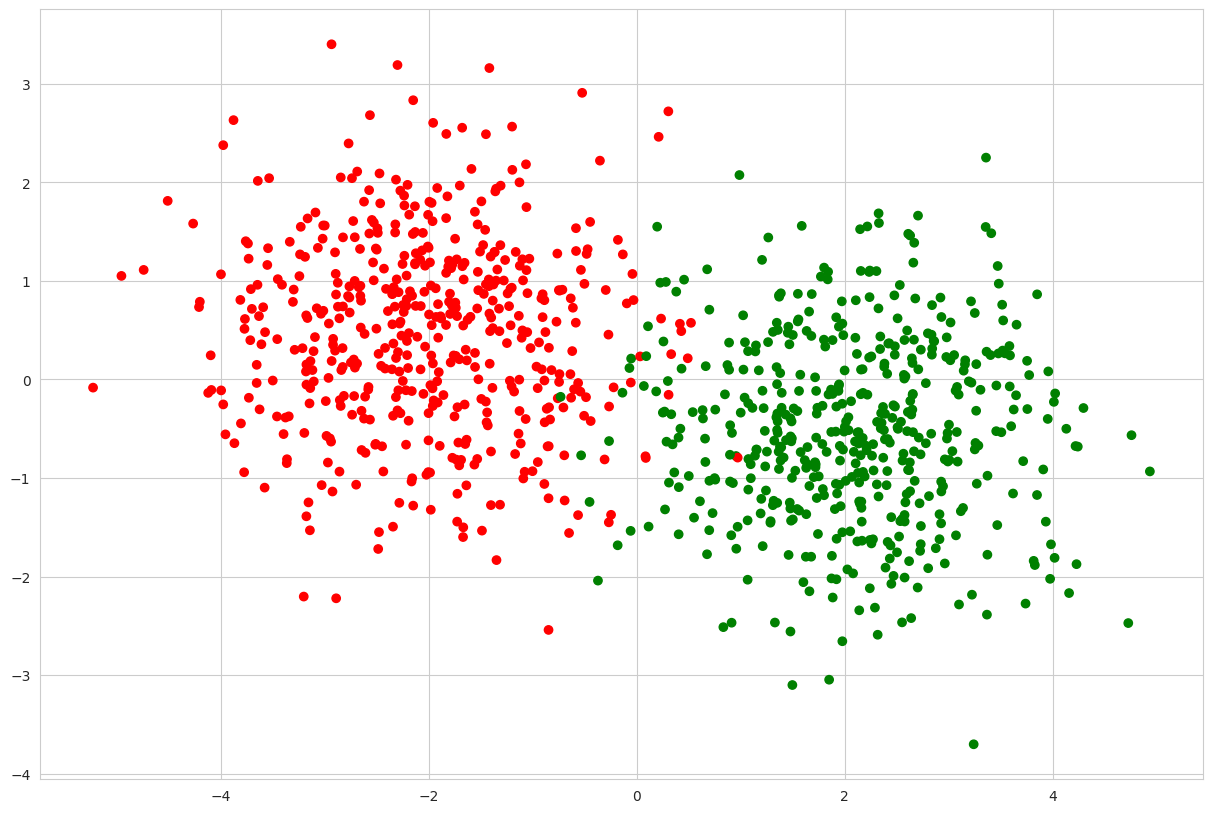

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=[[-2, 0.5], [2, -0.5]])

colors = ('red', 'green')
colored_y = np.zeros(len(y), dtype=str)
for i, group in enumerate([0, 1]):
    colored_y[y == group] = colors[group]

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

<h2> LogLoss

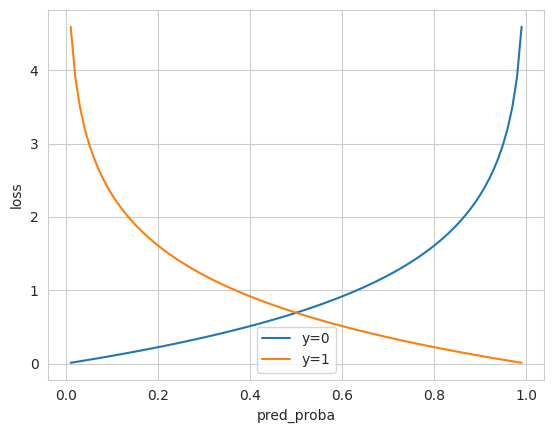

In [13]:
def log_loss(cl_pred, cl):
    return -(cl * np.log(cl_pred) + (1 - cl) * np.log(1 - cl_pred))

x = np.linspace(0, 1, 100)

y_list = [0, 1]
for i, cl in enumerate(y_list):
    plt.plot(x, log_loss(x, cl), label=f'y={cl}')
plt.xlabel('pred_proba')
plt.ylabel('loss')
plt.legend()

In [14]:
from LogisticRegression import LogisticRegression

classifier = LogisticRegression(fit_intercept=True)
classifier.fit(X, y[:, np.newaxis], lr=0.02)

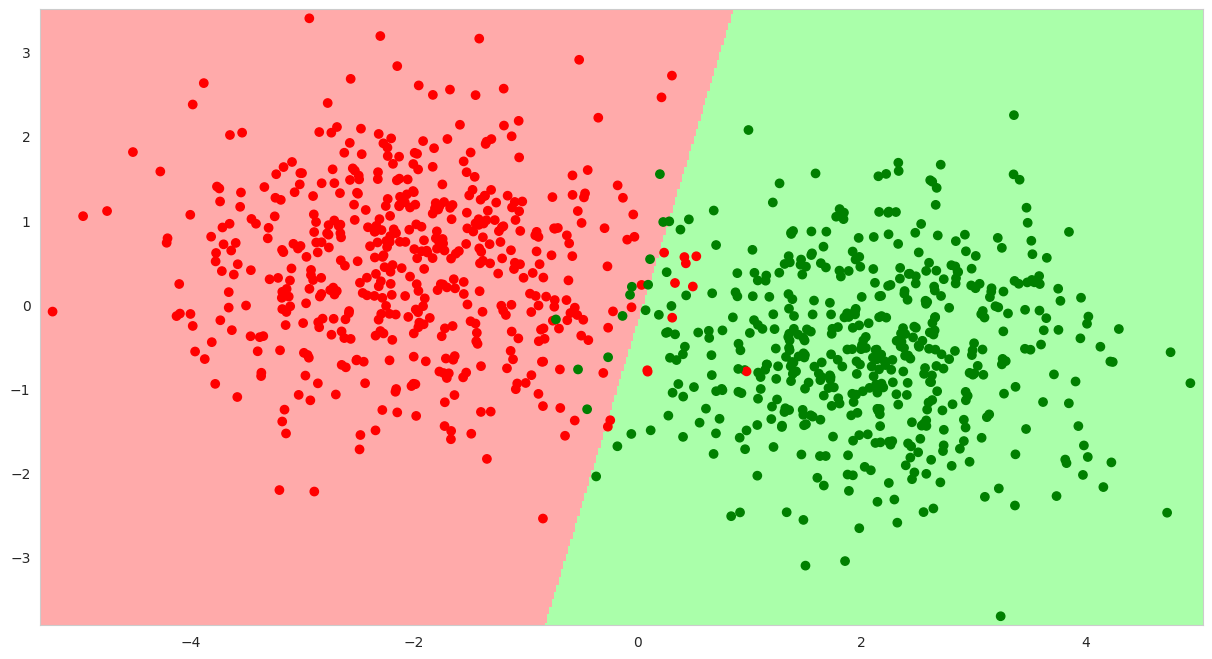

In [15]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

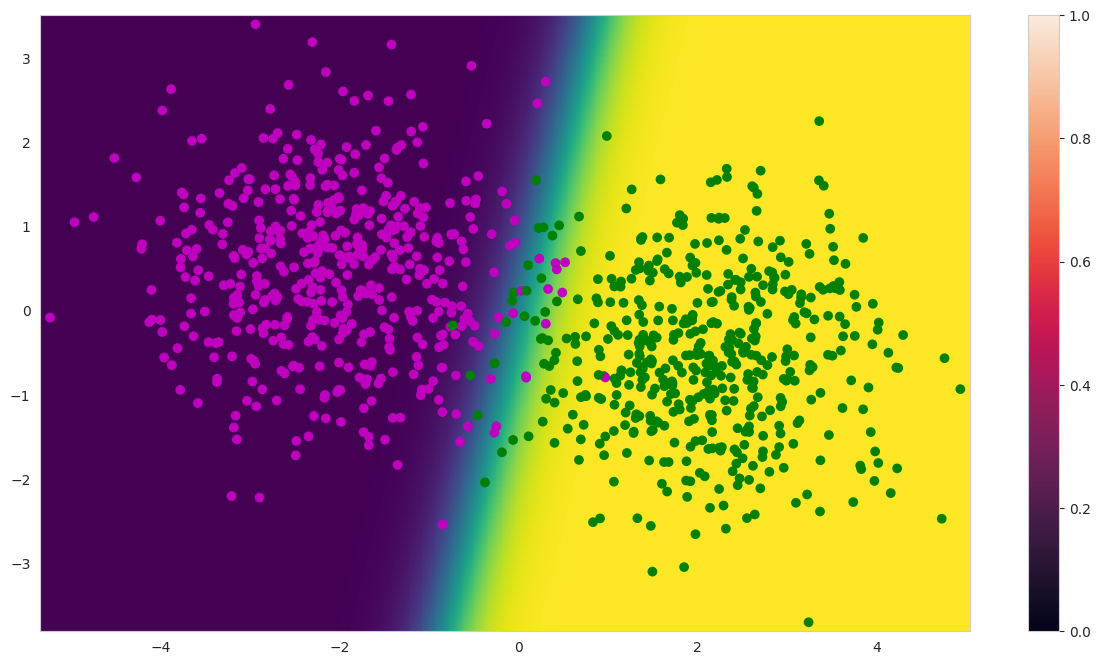

In [16]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = colors[i]


plt.figure(figsize=(15,8))

Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()

<h1> Regularization

<h2> Ridge regression

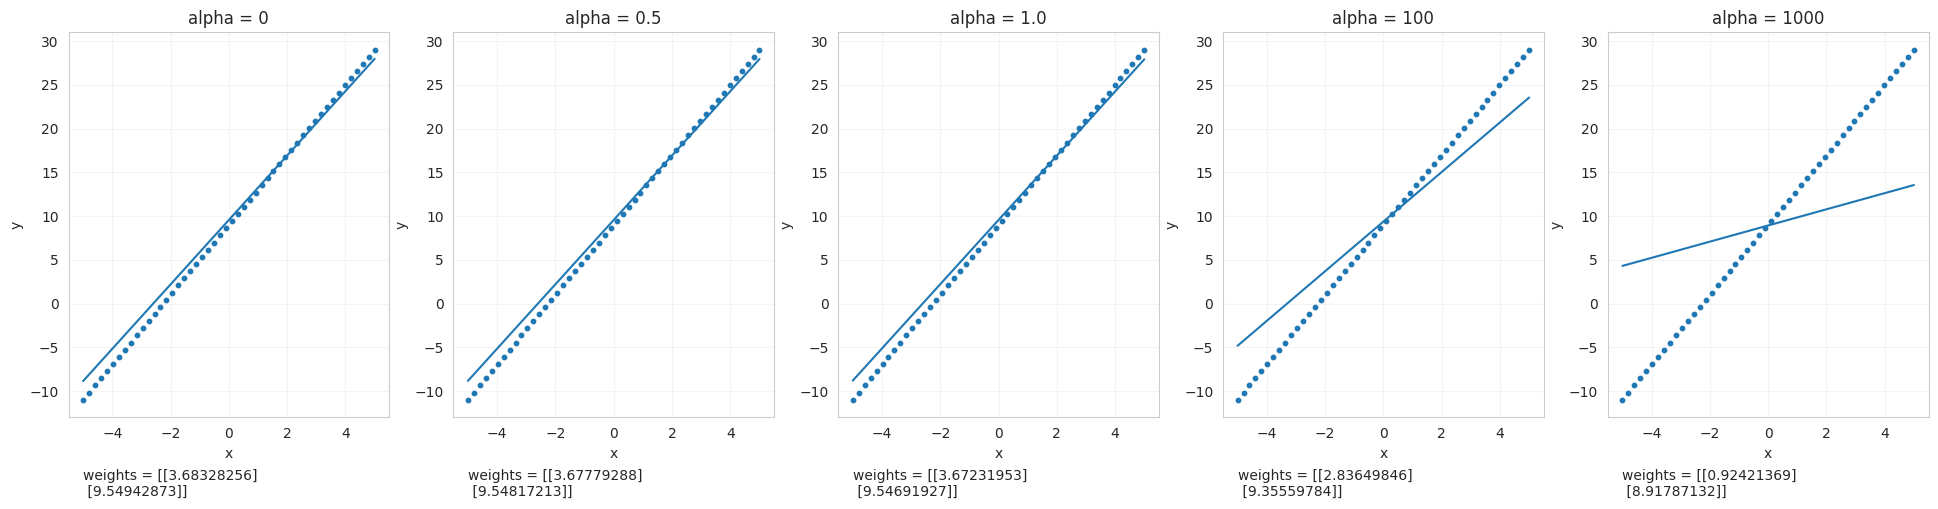

In [17]:
from RidgeRegression import RidgeRegression

alpha_list = [0, 0.5, 1.0, 100, 1000]
x = np.linspace(-5, 5, n_objects)

plt.figure(figsize=(24, 5))
for i, alpha in enumerate(alpha_list):
    ax = plt.subplot(1, len(alpha_list), i + 1)
    regressor = RidgeRegression(fit_intercept=True, alpha=alpha)
    regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])
    plt.scatter(x, linear_function(x), s=10)
    plt.plot(x, regressor.predict(x[:, np.newaxis]))
    plt.grid(alpha=0.2)
    plt.title(f'alpha = {alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.text(-5, -22, f'weights = {regressor.w}')

In [18]:
from sklearn import linear_model

sklearn_reg = linear_model.Ridge(fit_intercept=True, alpha=1.75)
regressor = RidgeRegression(fit_intercept=True, alpha=1.75)

sklearn_reg.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])
regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])

assert np.allclose(np.ravel(regressor.get_weights()), np.append(sklearn_reg.coef_, sklearn_reg.intercept_))

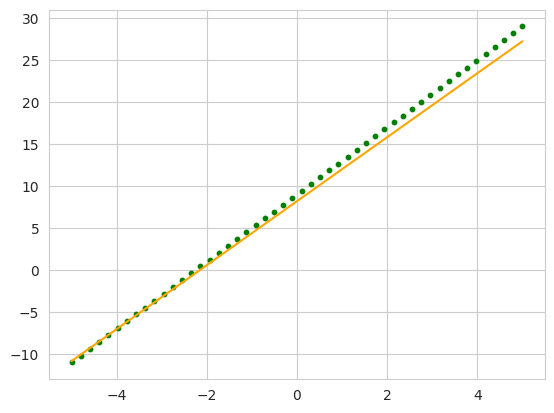

In [19]:
from RidgeRegression import RidgeRegressionSGD

regressor = RidgeRegressionSGD(fit_intercept=True, lr=0.002, steps=50, n_sample=10, alpha=1)
regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])

plt.scatter(x, linear_function(x), s=10, c='g')
plt.plot(x, regressor.predict(x[:, np.newaxis]), c='orange')

<h2> LASSO regression

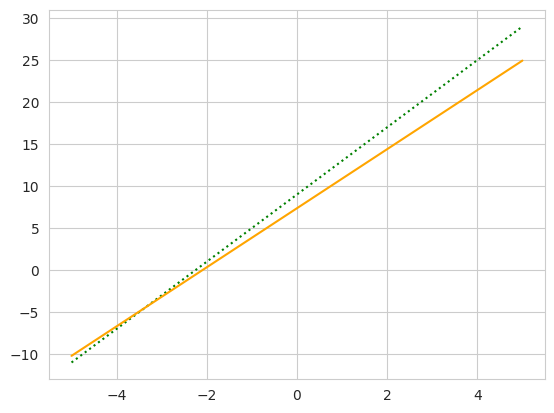

In [20]:
from LassoRegression import LASSORegression

regressor = LASSORegression(fit_intercept=True, alpha=1)
regressor.fit(features_train[:, np.newaxis], target_train[:, np.newaxis])

plt.plot(x, linear_function(x), c='g', linestyle=':')
plt.plot(x, regressor.predict(x[:, np.newaxis]), c='orange')

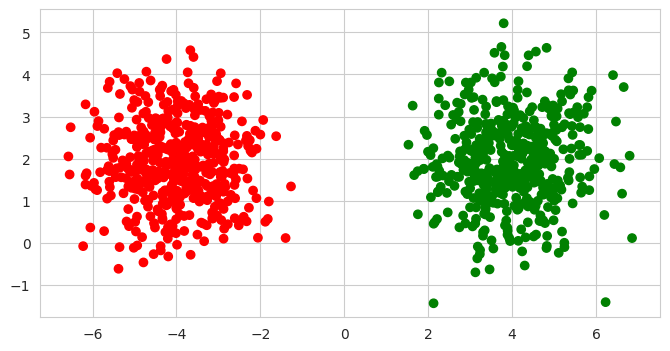

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=[[-4, 2], [4, 2]])

colors = ('red', 'green')
colored_y = np.zeros(len(y), dtype=str)
for i, group in enumerate([0, 1]):
    colored_y[y == group] = colors[group]

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [22]:
from LogisticRegression import LogisticRegression

classifier = LogisticRegression(fit_intercept=True)
classifier.fit(X, y[:, np.newaxis], lr=0.02)

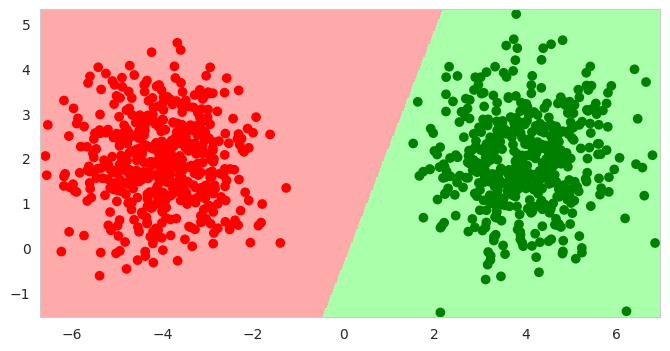

In [23]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(8,4))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

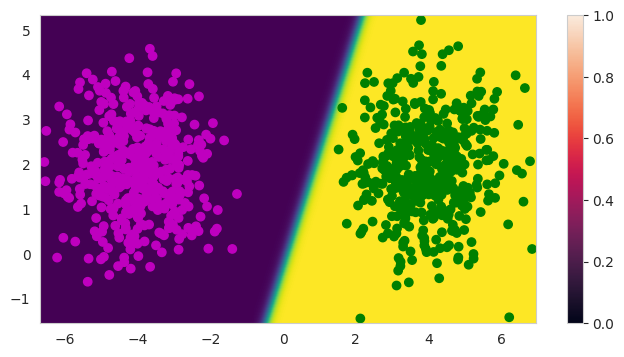

In [24]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = colors[i]


plt.figure(figsize=(8,4))

Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()

<h1> Example

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

In [26]:
iris = load_iris()

In [27]:
data = pd.DataFrame(data=np.hstack((iris.data, iris.target[:, np.newaxis])),
                    columns=iris.feature_names + ['target'])

names = data.columns
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


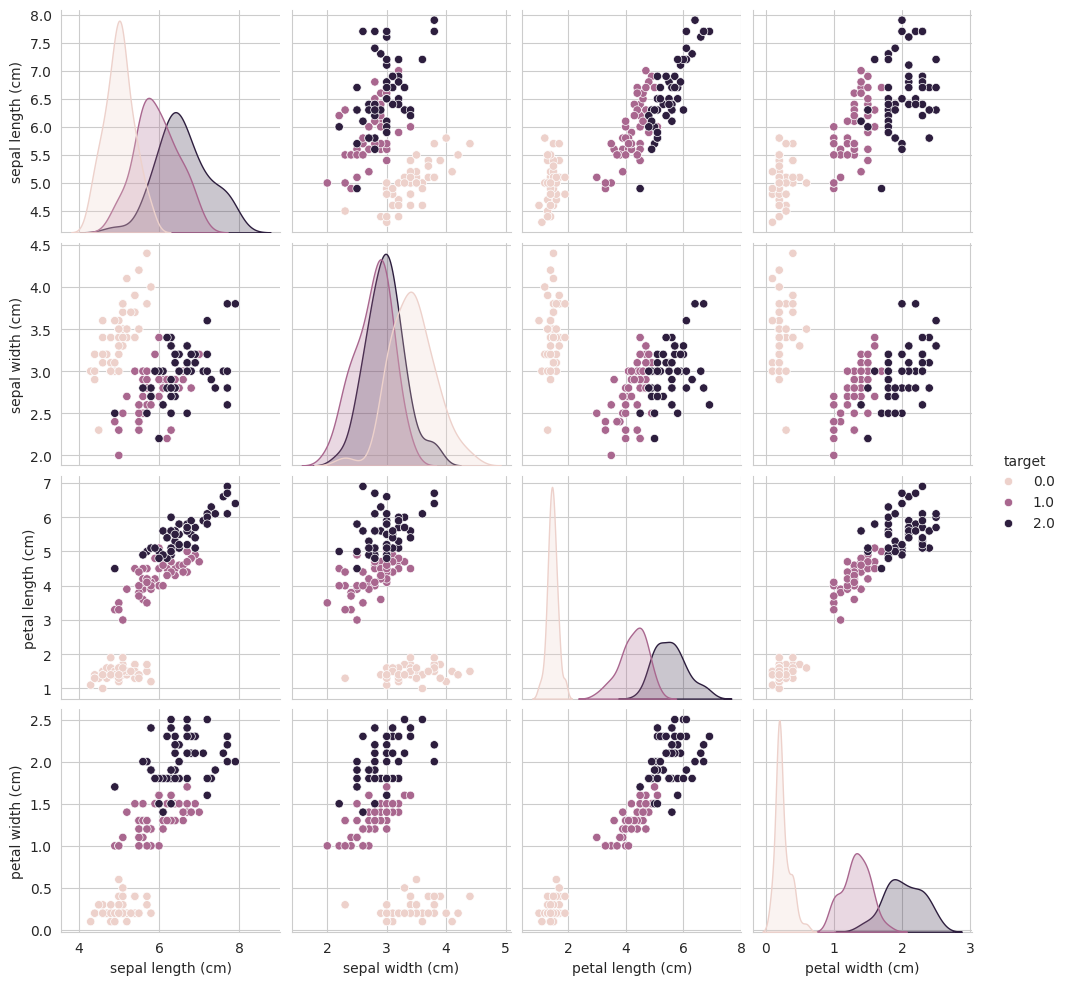

In [28]:
sns.pairplot(data, hue='target')

plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data[names[:-1]], data[names[-1]])

In [30]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

In [31]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=2)
)
cls.fit(X_train.to_numpy(), y_train)
preds_train = cls.predict(X_train)

accuracy_score(y_train, preds_train), f1_score(y_train, preds_train, average='macro')

(0.9910714285714286, 0.9906103286384976)

In [32]:
preds_test = cls.predict(X_test)

accuracy_score(preds_test, y_test), f1_score(preds_test, y_test, average='macro')

(0.9210526315789473, 0.9307048984468339)

In [33]:
cls[1].coef_, cls[1].intercept_

(array([[-1.17223122,  1.27552672, -2.24194268, -2.03075738],
        [ 0.70139267, -0.39346892, -0.5791682 , -0.88383388],
        [ 0.47083856, -0.88205781,  2.82111088,  2.91459126]]),
 array([ 0.18519333,  2.30842562, -2.49361894]))

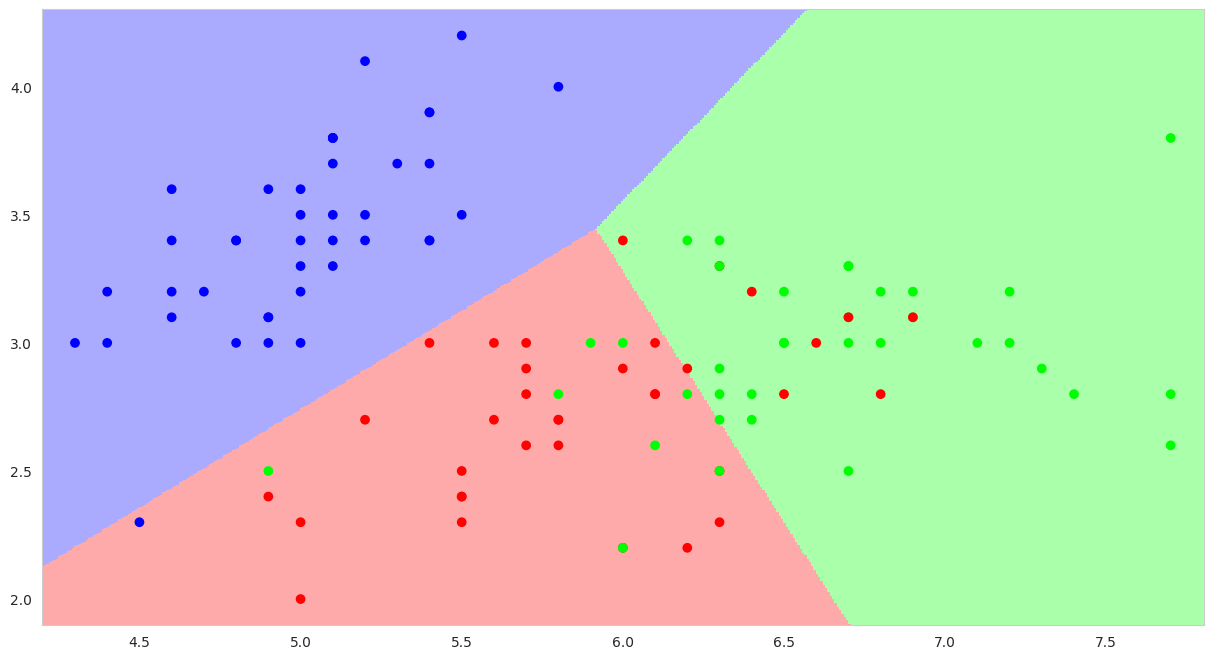

In [34]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_train[names[0]]) - eps, np.max(X_train[names[0]]) + eps, 500),
                     np.linspace(np.min(X_train[names[1]]) - eps, np.max(X_train[names[1]]) + eps, 500))



cls.fit(X_train[names[:2]], y_train)
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[names[0]], X_train[names[1]], c=y_train, cmap='brg')